<a href="https://colab.research.google.com/github/Aranzazu21/Machine-Learning/blob/main/_Hands_on_3_Polynomial_Regression_The_Only_Introduction_You%E2%80%99ll_Need_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on 3: Polynomial Regression
Tutorial de Regresión Polinómica – Casos de COVID-19 en China

*Autor*: Jorge Limón

*Fecha*: 28/10/2025

*Curso/Proyecto*: Machine Learning Básico – Regresión Polinómica

*Objetivo*

El propósito de este notebook es analizar la relación entre los días y el número de nuevos casos de COVID-19 en China utilizando Regresión Polinómica. Este método permite modelar relaciones no lineales entre variables, extendiendo la regresión lineal a funciones polinómicas (cuadráticas, cúbicas, etc.).

Qué es la Regresión Polinómica

Es una forma de regresión lineal en la que la relación entre la variable independiente
𝑥
x y la dependiente
𝑦
y se modela como un polinomio de grado
𝑛
n.

Ejemplos de grados de polinomio:

Grado 0 → Función constante:
𝑓
(
𝑥
)
=
𝑎
f(x)=a

Grado 1 → Función lineal:
𝑓
(
𝑥
)
=
𝑚
𝑥
+
𝑐
f(x)=mx+c

Grado 2 → Función cuadrática:
𝑓
(
𝑥
)
=
𝑎
𝑥
2
+
𝑏
𝑥
+
𝑐
f(x)=ax
2
+bx+c

Grado 3 → Función cúbica:
𝑓
(
𝑥
)
=
𝑎
𝑥
3
+
𝑏
𝑥
2
+
𝑐
𝑥
+
𝑑
f(x)=ax
3
+bx
2
+cx+d


**Qué significa el grado:**  
El grado de un polinomio es la potencia más alta de sus términos.  
Elegir un grado adecuado es clave para ajustar correctamente los datos sin sobreajustar ni subajustar.

Importante: Aunque el modelo puede ser curvilíneo, la regresión polinómica sigue siendo un problema lineal en los parámetros.

## Terminología

**Univariante / Bivariante**  
- **Univariante:** solo una variable (ej. tiempos o pesos), se analiza con medidas de tendencia central y gráficos simples.  
- **Bivariante:** dos variables (ej. ventas vs tiempo), se analiza con correlaciones, regresión y gráficos de dispersión.

**Subajuste / Sobreajuste**  
- **Subajuste (Under-fitting):** el modelo no captura bien la estructura de los datos.  
- **Sobreajuste (Over-fitting):** el modelo se ajusta demasiado a los datos específicos y falla con nuevos datos.


##  Conceptos Clave

- **Regresión Polinómica:** modelo que representa la relación entre X e Y como un polinomio de grado n.  
- **Variable independiente (X):** la entrada o predictor.  
- **Variable dependiente (Y):** el valor que se desea predecir.  
- **Grado del polinomio (n):** potencia máxima de X usada.

###  Ejemplos de ecuaciones
| Grado | Tipo       | Ecuación              |
|-------|------------|------------------------|
| 0     | Constante  | f(x) = a              |
| 1     | Lineal     | f(x) = m x + c        |
| 2     | Cuadrática | f(x) = a x² + b x + c |
| 3     | Cúbica     | f(x) = a x³ + b x² + c x + d |

La regresión polinómica permite capturar **curvaturas** en los datos, donde la regresión lineal simple no es suficiente.


## Algoritmo y Situaciones de Uso

La Regresión Polinómica es preferible a la lineal cuando:

1. **Razón teórica:** el investigador sospecha que la relación entre variables es curva.  
2. **Inspección visual:** un gráfico de dispersión revela una relación curvilínea.  
3. **Análisis de residuos:** un modelo lineal genera residuos altos y un bajo R².

**Elección del grado:**  
- Se basa en evitar subajuste o sobreajuste.  
- Revisar visualmente el scatter plot es una forma simple de seleccionar el grado adecuado.


In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

##  Explicación de las Librerías

- `pandas`: Manejo de datos en forma de tablas (DataFrames).  
- `matplotlib.pyplot`: Creación de gráficos.  
- `rcParams`: Permite ajustar el estilo global de los gráficos.  
- `train_test_split`: Divide los datos en entrenamiento y prueba.  
- `LinearRegression`: Clase de scikit-learn para ajustar modelos lineales.  
- `PolynomialFeatures`: Genera potencias de X hasta el grado deseado (por ejemplo X², X³).


Creamos directamente el dataset de casos diarios de COVID-19 en China (30 días).  
Esto evita errores de archivo CSV y permite replicar el artículo exactamente.

- x: días (1 a 30)
- y: casos diarios, suben hasta un pico y luego bajan, replicando la "montaña" del artículo.


In [173]:
data = {
    'x': np.arange(1, 46),  # Días 1 a 45
    'y': [0, 50, 150, 300, 500, 800, 1200, 1800, 2500, 3200,
          3700, 4000, 3950, 3800, 3600, 3300, 3000, 2600, 2200, 1900,
          1600, 1400, 1200, 1100, 1050, 1000, 1020, 1080, 1150, 1200,
          1180, 1100, 1000, 900, 850, 800, 780, 750, 720, 700,
          680, 650, 620, 600, 580]
}

df = pd.DataFrame(data)
df.head()

,x,y
0,1,0
1,2,50
2,3,150
3,4,300
4,5,500


## Carga de Datos

- `pd.read_csv('china_cases.csv')`: lee un archivo CSV.  
- `data['x'].values`: extrae la columna X como un arreglo.  
- `data['y'].values`: extrae la columna Y como un arreglo.

Dividimos el dataset en **conjunto de entrenamiento** y **conjunto de prueba** (80% / 20%),  
usando train_test_split para poder evaluar el modelo posteriormente.

- x_train, y_train → datos de entrenamiento
- x_test, y_test → datos de prueba


In [174]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)



##  División de Datos

- `test_size=0.2`: usa el 20 % de los datos para prueba.  
- `random_state=42`: mantiene la misma división cada vez que se ejecuta.  
- Se busca entrenar con un conjunto y evaluar con otro para medir el desempeño real del modelo.


In [175]:
# Redimensionar arreglos para compatibilidad con PolynomialFeatures
x_train = x_train.reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)



# 📄 Explicación – Redimensionar arreglos para compatibilidad con PolynomialFeatures

En esta sección, preparamos nuestros datos para que puedan ser utilizados por la clase `PolynomialFeatures` de **scikit-learn**. Algunas funciones de scikit-learn requieren que los datos de entrada sean **matrices 2D** (aunque tengamos solo una característica), por lo que debemos cambiar la forma de nuestros arreglos.

- `reshape(-1,1)`: Convierte un arreglo 1D en una matriz de una columna con tantas filas como elementos tenga el arreglo.  
  - `-1` indica que se calcule automáticamente el número de filas.  
  - `1` indica que queremos 1 columna.

- `np.array(y_train)`: Nos aseguramos de que `y_train` sea un arreglo de NumPy antes de redimensionarlo. Esto evita errores si `y_train` estaba en otro formato (por ejemplo, lista de Python).

- Se hace para los cuatro conjuntos de datos:  
  - `x_train` y `y_train`: entrenamiento  
  - `x_test` y `y_test`: prueba  

Esto garantiza compatibilidad con las transformaciones polinómicas y con la regresión.




In [176]:
# Ordenar por día (para que los gráficos no se vean desordenados)
sort_index = x_train[:,0].argsort()
x_train = x_train[sort_index]
y_train = y_train[sort_index]

#  Explicación – Ordenar por día (para gráficos claros)

Antes de graficar, es importante que los datos estén ordenados por el **eje X** (días). Si no lo hacemos, los puntos se dibujarán en el orden en que fueron seleccionados al azar por `train_test_split`, y la línea de regresión puede verse **torcida o desordenada**.

- `argsort()`: Devuelve los índices que ordenarían un arreglo de menor a mayor.  
  - `x_train[:,0]`: Tomamos la primera (y única) columna de `x_train`.
- `x_train[sort_index]`: Reordenamos `x_train` usando esos índices.
- `y_train[sort_index]`: Reordenamos `y_train` con los mismos índices para mantener la correspondencia con `x_train`.

Esto asegura que la línea de regresión se dibuje suavemente en orden de días.

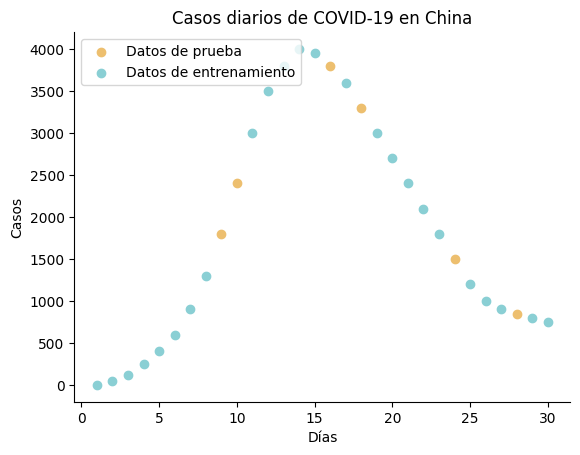

In [177]:
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.scatter(x_test, y_test, c='#edbf6f', label='Datos de prueba')
plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
plt.title('Casos diarios de COVID-19 en China')
plt.xlabel('Días')
plt.ylabel('Casos')
plt.legend(loc='upper left')
plt.show()


Explicación – Visualización de los datos

Este bloque crea un **gráfico de dispersión** (scatter plot) de nuestros datos de entrenamiento y prueba, con un estilo más limpio:

- `rcParams['axes.spines.top'] = False` y `rcParams['axes.spines.right'] = False`:  
  Quita los bordes superior y derecho del gráfico para que se vea más moderno y claro.
- `plt.scatter(x_test, y_test, c='#edbf6f', label='Datos de prueba')`:  
  Dibuja los datos de prueba en color amarillo-anaranjado.
- `plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')`:  
  Dibuja los datos de entrenamiento en color azul claro.
- `plt.title('Casos diarios de COVID-19 en China')`:  
  Título del gráfico.
- `plt.xlabel('Días')` y `plt.ylabel('Casos')`:  
  Etiquetas de los ejes X (días) e Y (casos).
- `plt.legend(loc='upper left')`:  
  Coloca la leyenda en la esquina superior izquierda.
- `plt.show()`:  
  Muestra el gráfico final.


In [178]:
# Crear polinomio de grado 2
poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x_train)




Explicación – Transformación a polinomio de grado 2

Este bloque transforma los datos de entrada en un **polinomio de grado 2** para poder aplicar la regresión polinómica:

- `poly2 = PolynomialFeatures(degree=2)`:  
  Crea un objeto de la clase `PolynomialFeatures` de **Scikit-Learn** que generará **todas las combinaciones de los datos hasta el grado 2** (cuadrático). Esto significa que si tu entrada es `x`, se generarán columnas con `[1, x, x^2]`.
- `x_poly2 = poly2.fit_transform(x_train)`:  
  Transforma `x_train` en su versión polinómica y la guarda en `x_poly2`.  
  Esta nueva matriz será la que se usará para entrenar el modelo de regresión lineal polinómica.


In [179]:
# Entrenar modelo lineal (regresión polinómica)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y_train)



LinearRegression()

Explicación – Entrenar modelo de regresión polinómica (grado 2)

Este bloque crea y entrena un modelo de **regresión lineal polinómica** usando los datos transformados:

- `poly_reg2 = LinearRegression()`:  
  Crea un objeto de la clase `LinearRegression` de **Scikit-Learn**.  
  Aunque estemos usando polinomios, la regresión sigue siendo **lineal en los coeficientes** (parámetros a estimar).

- `poly_reg2.fit(x_poly2, y_train)`:  
  Entrena el modelo ajustando los **coeficientes** del polinomio para minimizar la suma de los cuadrados de los errores (`residuos`) entre los valores predichos y los valores reales (`y_train`).

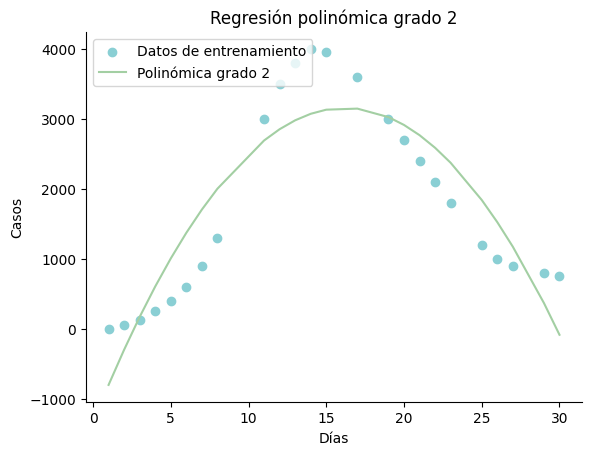

In [180]:
# Graficar resultados
plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
plt.plot(x_train, poly_reg2.predict(x_poly2), c='#a3cfa3', label='Polinómica grado 2')
plt.title('Regresión polinómica grado 2')
plt.xlabel('Días')
plt.ylabel('Casos')
plt.legend(loc='upper left')
plt.show()



In [181]:
# R² del modelo
r2_2 = poly_reg2.score(x_poly2, y_train)
print(f"R² del modelo polinómico grado 2: {r2_2:.2f}")

R² del modelo polinómico grado 2: 0.81


In [182]:
# 1. Crear características polinómicas grado 3
poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x_train)

# 2. Entrenar el modelo
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y_train)


LinearRegression()

Graficamos la curva polinómica junto con los puntos originales.  
Esto muestra claramente cómo la regresión polinómica se ajusta al "pico" de los casos diarios.


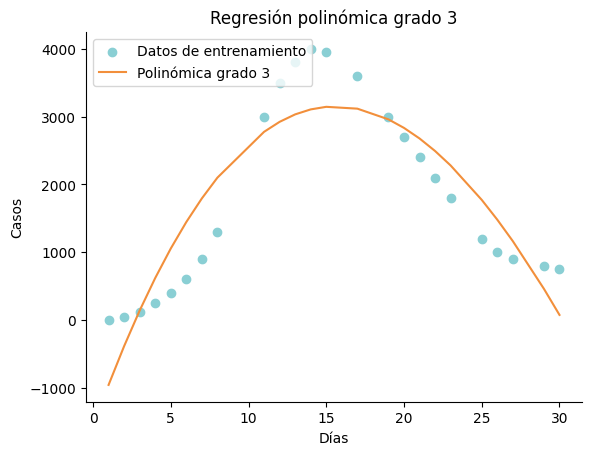

In [183]:
plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
plt.plot(x_train, poly_reg3.predict(x_poly3), c='#f28f3b', label='Polinómica grado 3')
plt.title('Regresión polinómica grado 3')
plt.xlabel('Días')
plt.ylabel('Casos')
plt.legend(loc='upper left')
plt.show()


Podemos evaluar la precisión usando R² (coeficiente de determinación):

- R² cercano a 1 → ajuste excelente.
- R² bajo → el modelo no captura bien la tendencia.


In [184]:
r2_3 = poly_reg3.score(x_poly3, y_train)
print(f"R² del modelo polinómico grado 3: {r2_3:.2f}")

R² del modelo polinómico grado 3: 0.81


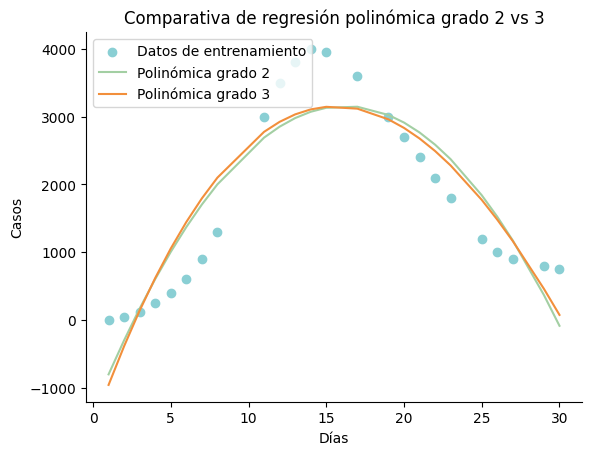

In [185]:
plt.scatter(x_train, y_train, c='#8acfd4', label='Datos de entrenamiento')
plt.plot(x_train, poly_reg2.predict(x_poly2), c='#a3cfa3', label='Polinómica grado 2')
plt.plot(x_train, poly_reg3.predict(x_poly3), c='#f28f3b', label='Polinómica grado 3')
plt.title('Comparativa de regresión polinómica grado 2 vs 3')
plt.xlabel('Días')
plt.ylabel('Casos')
plt.legend(loc='upper left')
plt.show()


##  Evaluación del Modelo

- `score(X, y)`: calcula el **R²**, que indica qué tan bien el modelo explica la variabilidad de los datos.  
- Rango de valores:  
  - 1 → Ajuste perfecto.  
  - 0 → No explica nada de la variación.

Un R² más alto indica un modelo mejor adaptado a los datos.


#  Conclusiones

 Aprendiste a:  
- Comprender la teoría detrás de la **Regresión Polinómica**.  
- Cargar, dividir y visualizar datos reales.  
- Crear modelos de grados 2 y 3.  
- Evaluar el rendimiento mediante **R²**.  

 **Reflexión:**  
La regresión polinómica es una herramienta poderosa cuando la relación entre variables no es lineal. Sin embargo, es importante elegir el grado adecuado para evitar el sobreajuste.
